In [8]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-fitting-pirate)

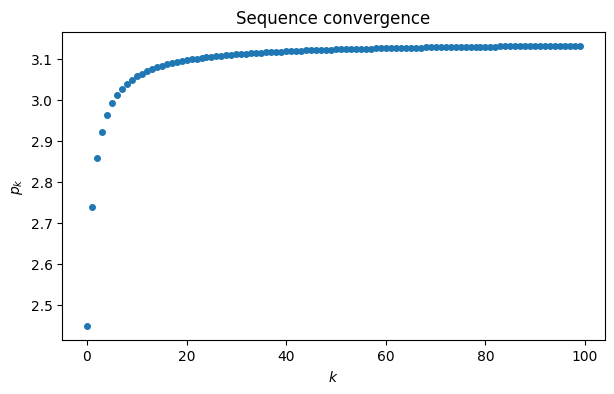

In [9]:
a = array([1 / (k+1)**2 for k in range(100)])
s = cumsum(a)        # cumulative summation
p = sqrt(6*s)

plot(range(100), p, "o")
xlabel("$k$") 
ylabel("$p_k$") 
title("Sequence convergence");

This graph suggests that maybe $p_k\to \pi$, but it's far from clear how close the sequence gets. It's more informative to plot the sequence of errors, $\epsilon_k= |\pi-p_k|$. By plotting the error sequence on a log-log scale, we can see a nearly linear relationship.

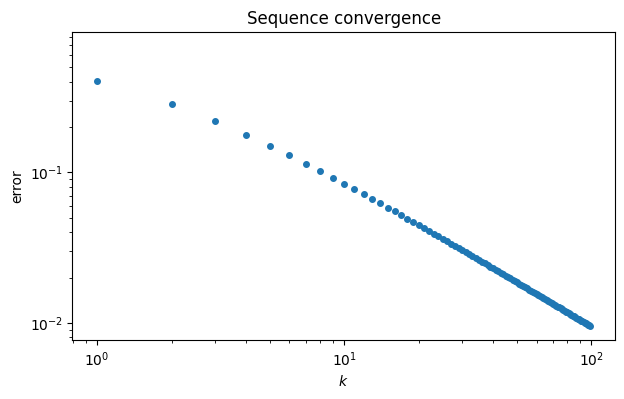

In [10]:
ep = abs(pi - p)    # error sequence
loglog(range(100), ep, "o")
xlabel("$k$") 
ylabel("error") 
title("Sequence convergence");  

The straight line on the log-log scale suggests a power-law relationship where $\epsilon_k\approx a k^b$, or $\log \epsilon_k \approx b (\log k) + \log a$.

In [11]:
from numpy.linalg import lstsq
V = array([ [1, log(k+1)] for k in range(100) ])     # fitting matrix
c = lstsq(V, log(ep), rcond=None)[0]           # coefficients of linear fit
print(c)

[-0.18237525 -0.96741032]


In terms of the parameters $a$ and $b$ used above, we have

In [12]:
a, b = exp(c[0]), c[1]
print(f"b: {b:.3f}")

b: -0.967


It's tempting to conjecture that the slope $b\to -1$ asymptotically. Here is how the numerical fit compares to the original convergence curve.

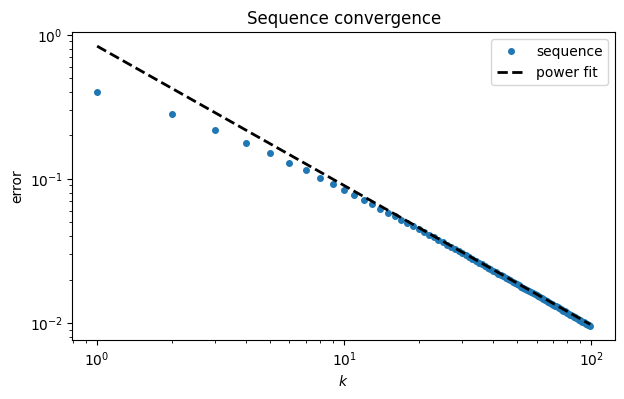

In [13]:
loglog(range(100), ep, "o", label="sequence")
k = arange(1,100)
plot(k, a*k**b, "k--", label="power fit")
xlabel("$k$");  ylabel("error"); 
legend(); title("Sequence convergence");